In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


 ### Numpy
"numpy.clip()" sirve para acotar los valores de un array y los valores fuera de la cota se sustituyen. \
"numpy.ptp()" regresa el rango del arreglo (la longitud menos uno)

In [18]:
a = np.array([1, 2, 3, 4, 5])
print("Original array:", a)
print("Clipped array:", np.clip(a, 2, 4))
print("Range of array:", np.ptp(a))

Original array: [1 2 3 4 5]
Clipped array: [2 2 3 4 4]
Range of array: 4


### Matplotlob
"matplotlib.pyplot.xcorr()" Se usa para gráficar la cruz de correlación \
"matplotlib.pyplot.specgram()" Se usa para graficar un espectrograma 

/tmp/ipykernel_18472/516648994.py:5: UserWarning: Only one segment is calculated since parameter NFFT (=100) >= signal length (=100).
  ax2.specgram(x, NFFT=100, Fs=2, noverlap=90, mode='psd')


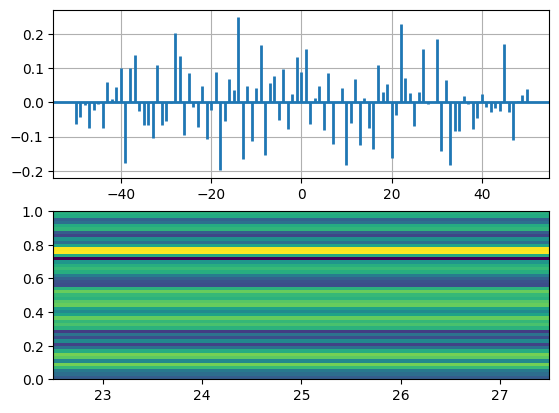

In [19]:
x, y = np.random.randn(2, 100)
fig, [ax1, ax2] = plt.subplots(2, 1)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax2.specgram(x, NFFT=100, Fs=2, noverlap=90, mode='psd')
plt.show()

### Pandas
"pandas.DataFrame.melt()" Esta función es útil para tratar un DataFrame en un formato en el que una o más columnas son variables identificadoras, mientras que todas las demás columnas, consideradas variables medidas, se desvinculan del eje de filas, dejando sólo dos columnas no identificadoras, variable y valor. \
"pandas.DataFrame.pivot()" Esta función remodela los datos (produce una tabla "pivotante") basándose en los valores de las columnas. Utiliza valores únicos del índice / columnas especificadas para formar los ejes del DataFrame resultante.

In [23]:
df = pd.DataFrame({'A': ['foo', 'foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar'],
                   'B': ['one', 'one', 'two', 'two', 'one', 'one', 'two', 'two'],
                   'C': ['small', 'large', 'large', 'small', 'small', 'large', 'small', 'large'],
                   'D': [1, 2, 2, 3, 3, 4, 5, 6],
                   'E': [2, 4, 5, 5, 6, 6, 8, 9]})
print("Original DataFrame:\n", df)
melted = df.melt(id_vars=['A', 'B'], value_vars=['D', 'E'])
print("Melted DataFrame:\n", melted)

Original DataFrame:
      A    B      C  D  E
0  foo  one  small  1  2
1  foo  one  large  2  4
2  foo  two  large  2  5
3  foo  two  small  3  5
4  bar  one  small  3  6
5  bar  one  large  4  6
6  bar  two  small  5  8
7  bar  two  large  6  9
Melted DataFrame:
       A    B variable  value
0   foo  one        D      1
1   foo  one        D      2
2   foo  two        D      2
3   foo  two        D      3
4   bar  one        D      3
5   bar  one        D      4
6   bar  two        D      5
7   bar  two        D      6
8   foo  one        E      2
9   foo  one        E      4
10  foo  two        E      5
11  foo  two        E      5
12  bar  one        E      6
13  bar  one        E      6
14  bar  two        E      8
15  bar  two        E      9


In [24]:
pivot = df.pivot_table(index='A', columns='B', values='D', aggfunc=np.mean)  # using np.mean as the aggregation function
print("Pivot DataFrame:\n", pivot)
print("Pivot DataFrame:\n", pivot)

Pivot DataFrame:
 B    one  two
A            
bar  3.5  5.5
foo  1.5  2.5
Pivot DataFrame:
 B    one  two
A            
bar  3.5  5.5
foo  1.5  2.5


/tmp/ipykernel_18472/413127771.py:1: FutureWarning: The provided callable <function mean at 0x7ff440383d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = df.pivot_table(index='A', columns='B', values='D', aggfunc=np.mean)  # using np.mean as the aggregation function
